In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv("Cleaned_Dataset.csv")

# Task 1: Restaurant Reviews
1.Analyze the text reviews to identify the most common positive and negative keywords.      
2.Calculate the average length of reviews and explore if there is a relationship between review length and rating.

#### 1) Analyze the text reviews to identify the most common positive and negative keywords.


In [16]:
rating_count=df['Rating text'].value_counts().reset_index()
rating_count

,Rating text,count
0,Average,3737
1,Not rated,2148
2,Good,2100
3,Very Good,1079
4,Excellent,301
5,Poor,186


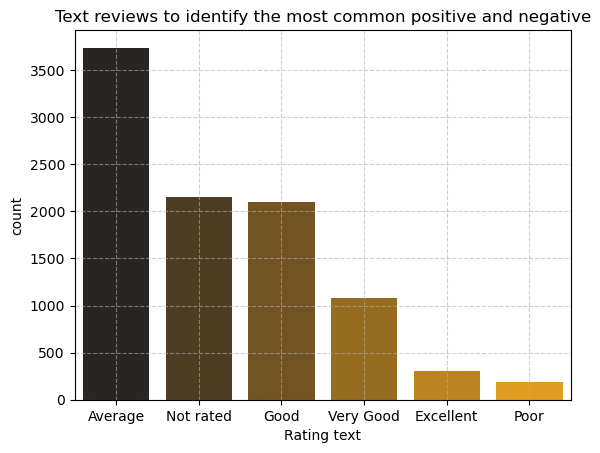

In [17]:
sns.barplot(data=rating_count , x='Rating text',y='count',color="orange",palette='dark:orange',hue='Rating text')
plt.title('Text reviews to identify the most common positive and negative')
plt.grid( linestyle="--", alpha=0.6)
plt.show()

Insight:        
Most frequent positives: “good,” “very good,” and “excellent,” with “good” variants dominating sentiment among rated reviews.       
Most frequent negatives: “average,” “poor,” and “not rated,” with “average” appearing most often overall and signaling lukewarm or negative experiences.


#### 2) Calculate the average length of reviews and explore if there is a relationship between review length and rating.

In [18]:
df['review length'] = df['Rating text'].astype(str).apply(lambda x: len(x.split()))

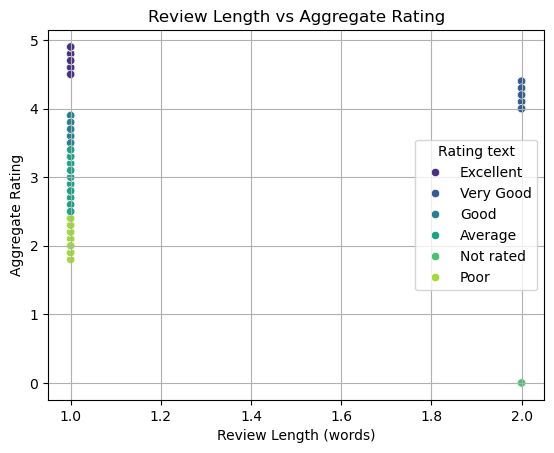

 Correlation between review length and rating: -0.60


In [19]:
sns.scatterplot(data=df, x='review length', y='Aggregate rating', hue='Rating text', palette='viridis')
plt.title('Review Length vs Aggregate Rating')
plt.xlabel('Review Length (words)')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.show()


correlation = df[['review length', 'Aggregate rating']].corr().iloc[0,1]
print(f" Correlation between review length and rating: {correlation:.2f}")

Most reviews are very short, but even short reviews can give high or low ratings — people can say a lot with just a few words.     
The correlation between review length and rating is –0.60, which means longer reviews usually come with lower ratings.

# Task 2 : Votes Analysis   
1. Identify the restaurants with the highest and lowest number of votes.        
2. Analyze if there is a correlation between the number of votes and the rating of a restaurant

#### 1) Identify the restaurants with the highest and lowest number of votes. 

In [20]:
highest_votes_restro = df[df['Votes'] == df['Votes'].max()]
lowest_votes_restro =df[df['Votes'] == df['Votes'].min()].head(5)


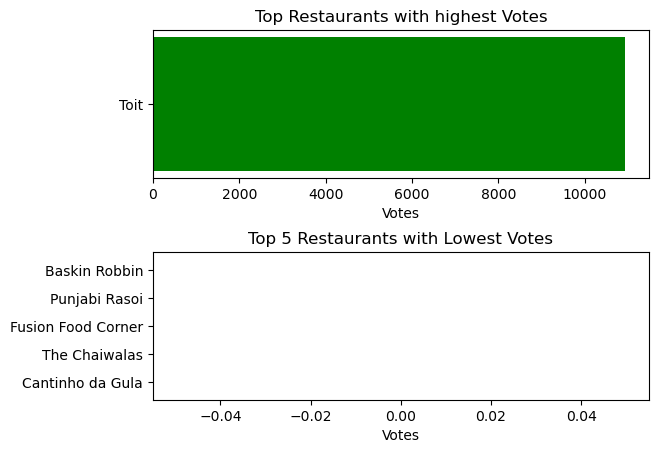

In [21]:
plt.subplot(2,1,1)
plt.barh(highest_votes_restro['Restaurant Name'], highest_votes_restro['Votes'], color='green')
plt.title('Top Restaurants with highest Votes')
plt.xlabel('Votes')

plt.subplots_adjust(hspace=0.5)  

plt.subplot(2,1,2)
plt.barh(lowest_votes_restro['Restaurant Name'], lowest_votes_restro['Votes'], color='red')
plt.title('Top 5 Restaurants with Lowest Votes')
plt.xlabel('Votes')
plt.show()

Insight:    
Toit has the highest votes, and there are many low‑vote restaurants;    
over 1,000 restaurants have 0 votes, but only 5 are shown here as examples

#### 2) Analyze if there is a correlation between the number of votes and the rating of a restaurant

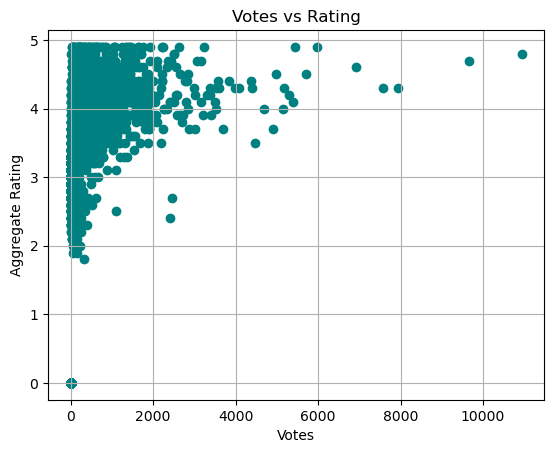

In [22]:
plt.scatter(df['Votes'], df['Aggregate rating'], color='teal')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.title('Votes vs Rating')
plt.grid(True)
plt.show()

Insight:     
Restaurants with more votes usually have higher ratings, while those with fewer votes can have both good or bad ratings.        
So, popularity often goes with better ratings.

# Task 3: Price Range vs. Online Delivery and Table Booking 
1. Analyze if there is a relationship between the price range and the availability of online delivery and table booking.     
2. Determine if higher-priced restaurants are more likely to offer these services.

In [23]:
df['Online Delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})
df['Table Booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})

In [24]:
grouped = df.groupby('Price range')[['Online Delivery', 'Table Booking']].mean().reset_index()
grouped

,Price range,Online Delivery,Table Booking
0,1,0.157741,0.000225
1,2,0.413106,0.076775
2,3,0.291903,0.457386
3,4,0.090444,0.467577


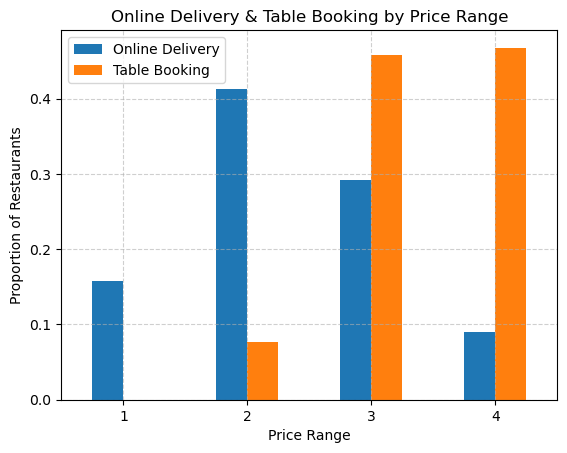

In [25]:
import matplotlib.pyplot as plt

grouped.plot(x='Price range', kind='bar', stacked=False)
plt.title('Online Delivery & Table Booking by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Proportion of Restaurants')
plt.xticks(rotation=0)
plt.grid( linestyle="--", alpha=0.6)
plt.show()

Insight:  
This chart shows that cheaper restaurants (price range 1–2) mostly offer online delivery, while expensive restaurants (price range 3–4) mostly focus on table booking.      
This shows that as price increases, restaurants focus more on table booking than online delivery.

In [29]:
df.to_csv('Cleaned_Dataset.csv',index=False)